In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import glob
from matplotlib import pyplot as plt
import seaborn as sns
import parse_seq as ps
import re
import bisect


In [ ]:
NEW_EXT = '/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/GherigGraphQuality/EXT/extended_contigs'
OLD_EXT = '/manitou/pmg/projects/korem_lab/Projects/MANU_copangraph/data/GherigGraphQuality/old_EXT/extended_contigs'
exts_new = sorted(glob.glob(os.path.join(NEW_EXT, '*.fasta')))
exts_old = sorted(glob.glob(os.path.join(OLD_EXT, '*.fasta')))
NEW_MH = '/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/GherigGraphQuality/EXT/megahit'
OLD_MH = '/manitou/pmg/projects/korem_lab/Projects/MANU_copangraph/data/GherigGraphQuality/old_EXT/megahit'
mh_new = sorted(glob.glob(os.path.join(NEW_MH, '*', 'final.contigs.fa')))
mh_old = sorted(glob.glob(os.path.join(OLD_MH, '*', 'final.contigs.fa')))
mh_old.pop(0)

'/manitou/pmg/projects/korem_lab/Projects/MANU_copangraph/data/GherigGraphQuality/old_EXT/megahit/GHERIG_SRR15489021/final.contigs.fa'

In [ ]:
def read_extensions(fl):
    with open(fl) as f:
        return [e for e in ps.parse(f, ps.PEExtContig)]

def get_extension_lengths(extensions, mode):
    assert mode in ['all', 'bwd', 'fwd']
    lengths = list()
    if mode == 'bwd':
        return np.array([e.bwd_ext for e in extensions if e.fwd_ext == 0])
    if mode == 'fwd':
        return np.array([e.fwd_ext for e in extensions if e.bwd_ext == 0])
    return np.array([e.bwd_ext if e.fwd_ext == 0 else e.fwd_ext for e in extensions])

def extract_name(filename):
    return re.findall('GHERIG_(SRR[0-9]+)', filename)

def get_extensions_dict(extension_files):
    d = dict()
    for f in extension_files:
        print(f)
        d[extract_name(f)[0]] = read_extensions(f)
    return d


def bin_search(elem, seq_list):
    idx = bisect.bisect_left(seq_list, elem.seq)
    return idx

def match_sequences(contigs_a, contigs_b):
    contigs_a = list(contigs_a)
    contigs_b = list(contigs_b)
    print(len(contigs_a), len(contigs_b))
    seq_b = sorted([e.seq for e in contigs_b])
    contigs_b = sorted(contigs_b, key=lambda x: x.seq)
    return [(a, contigs_b[bin_search(a, seq_b)]) for a in contigs_a]




In [ ]:
new_ext_dict = get_extensions_dict(exts_new[1:3])
old_ext_dict = get_extensions_dict(exts_old[1:3])

/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/GherigGraphQuality/EXT/extended_contigs/GHERIG_SRR15489022.pe_ext.fasta
/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/GherigGraphQuality/EXT/extended_contigs/GHERIG_SRR15489024.pe_ext.fasta
/manitou/pmg/projects/korem_lab/Projects/MANU_copangraph/data/GherigGraphQuality/old_EXT/extended_contigs/GHERIG_SRR15489022.pe_ext.fasta
/manitou/pmg/projects/korem_lab/Projects/MANU_copangraph/data/GherigGraphQuality/old_EXT/extended_contigs/GHERIG_SRR15489024.pe_ext.fasta


<Axes: xlabel='dataset', ylabel='ext'>

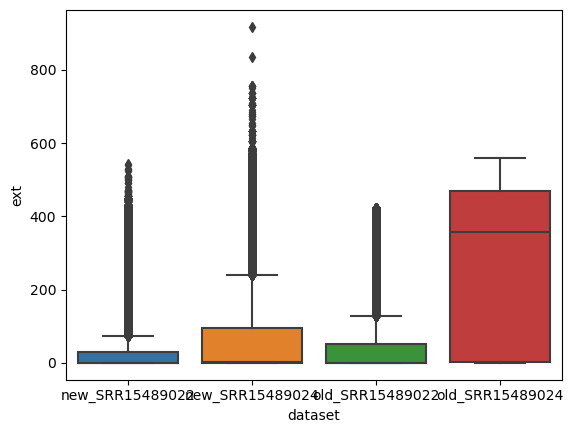

In [ ]:
dat = pd.DataFrame(columns=['ext', 'dataset'])
for k, v in new_ext_dict.items():
    a = get_extension_lengths(new_ext_dict[k], 'all')
    dat = pd.concat([dat, pd.DataFrame({'ext':a, 'dataset': len(a)*[f'new_{k}']})])
for k, v in old_ext_dict.items():
    a = get_extension_lengths(old_ext_dict[k], 'all')
    dat = pd.concat([dat, pd.DataFrame({'ext':a, 'dataset': len(a)*[f'old_{k}']})])
dat.index = range(len(dat))
sns.boxplot(x=dat.dataset, y=dat.ext)

In [ ]:
pairs = match_sequences(ps.parse(open(mh_new[0]), ps.MegaHITFasta), ps.parse(open(mh_old[0]), ps.MegaHITFasta))
print(mh_new[0])
print(mh_old[0])
old_d = defaultdict(int)
new_d = defaultdict(int)
for e in new_ext_dict['SRR15489022']:
    new_d[e.contig_id] += 1
for e in old_ext_dict['SRR15489022']:
    old_d[e.contig_id] += 1

old_ext_counts = np.array([old_d[e.cn] for _, e in pairs])
new_ext_counts = np.array([new_d[e.cn] for e,_ in pairs])
sns.scatterplot(x=old_ext_counts, y=new_ext_counts)

NameError: name 'match_sequences' is not defined

In [ ]:
old_d = defaultdict(int)
new_d = defaultdict(int)
for e in new_ext_dict['SRR15489022']:
    new_d[e.contig_id] += e.bwd_ext + e.fwd_ext
for e in old_ext_dict['SRR15489022']:
    old_d[e.contig_id] += e.bwd_ext + e.fwd_ext

old_ext_counts = np.array([old_d[e.cn] for _, e in pairs])
new_ext_counts = np.array([new_d[e.cn] for e,_ in pairs])
sns.scatterplot(x=old_ext_counts, y=new_ext_counts)

In [ ]:
get_extension_lengths(new_ext_dict['SRR15489024'], 'all').max()

918